<center> <h1> Convolutional Neural Networks </h1>  </center>


# ANN on MNIST

### Load MNIST dataset from keras.datasets

### Create a basic neural network with dense layers

### Let's improve the result by creating a CNN 

# Challenge : Cats vs Dogs Classification

https://www.kaggle.com/c/dogs-vs-cats

## Building the CNN

### Importing libraries and packages

In [1]:
from keras import models, layers

Using TensorFlow backend.
/Users/macbook/anaconda3/envs/TP2/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


### Initializing the CNN

In [66]:
classifier = models.Sequential()

### Step 1 - Convolution

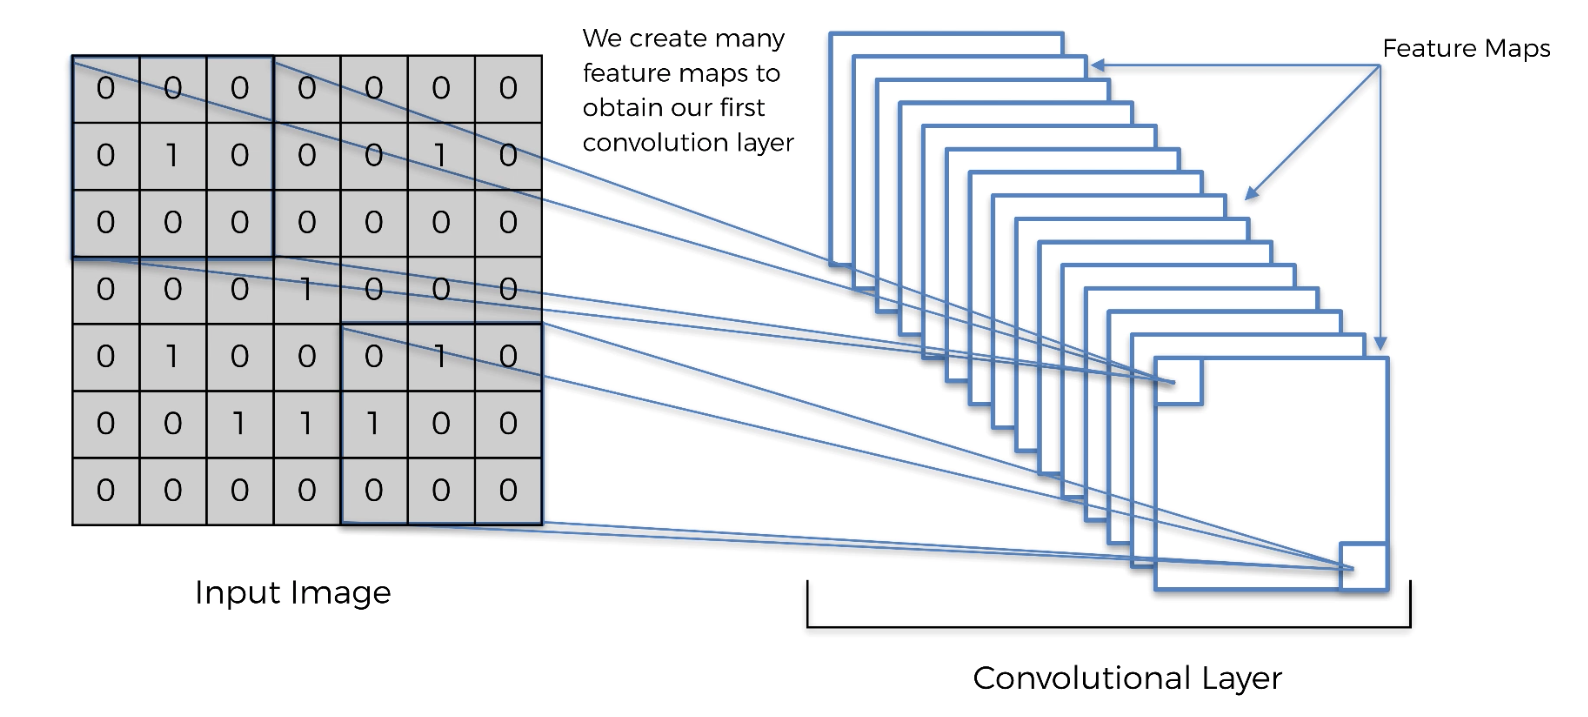

In [67]:
from IPython.display import Image
Image(filename='Convolution.png',width=800, height=800)

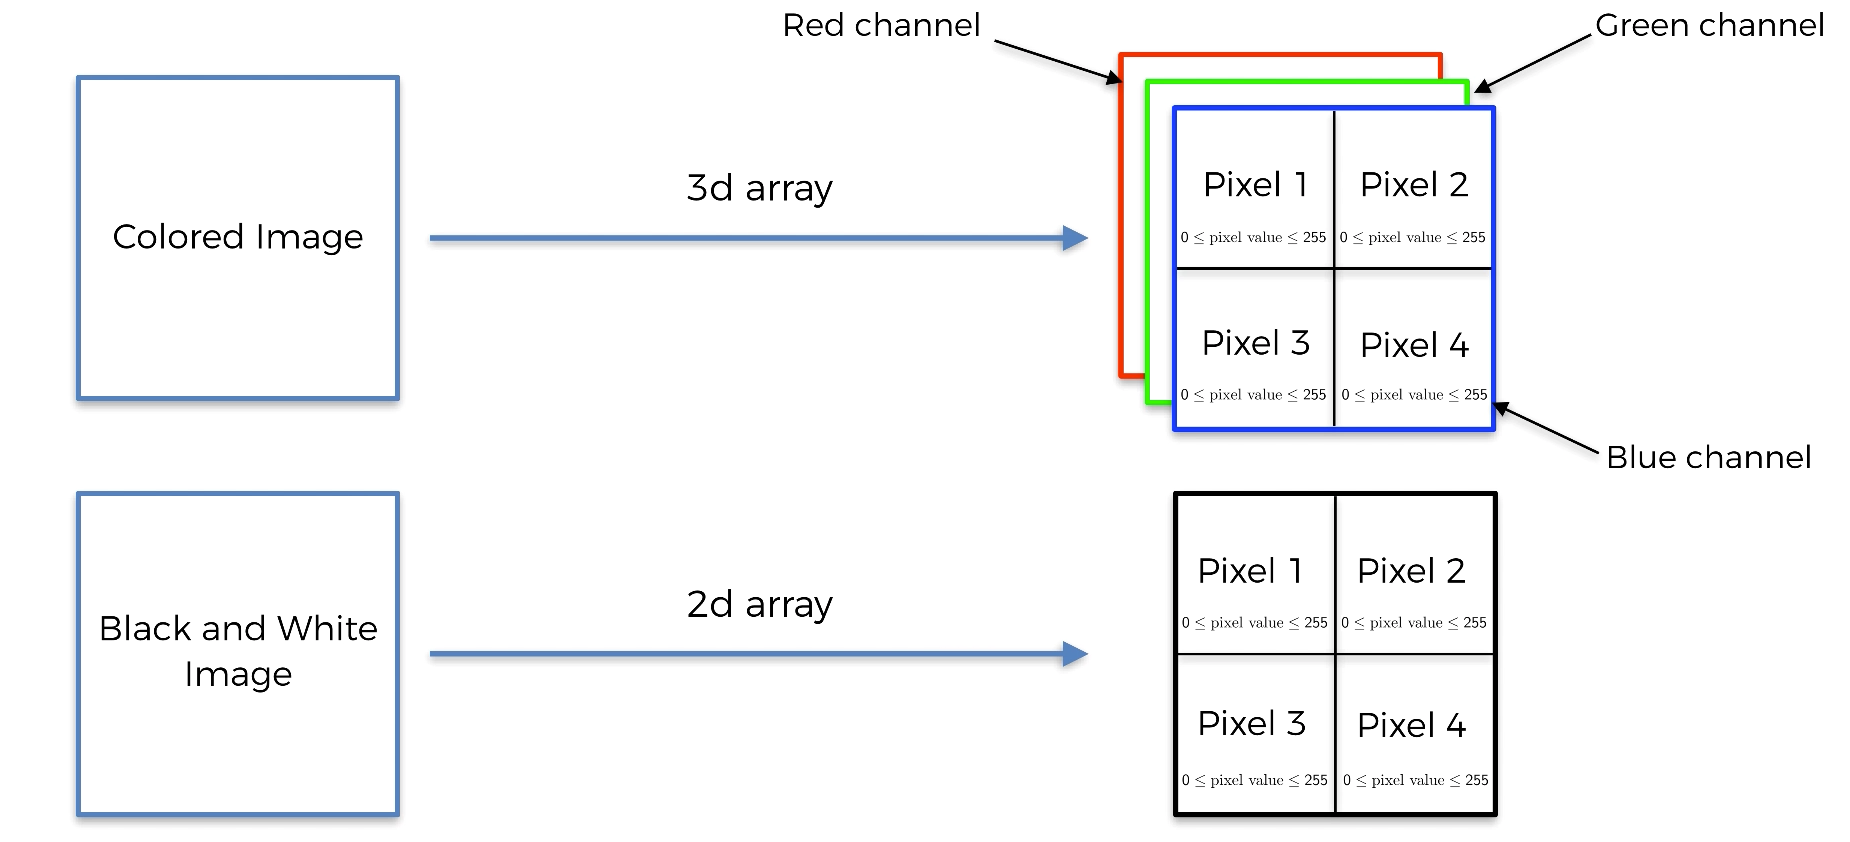

In [68]:
from IPython.display import Image
Image(filename='imagetoarrays.png',width=800, height=800)

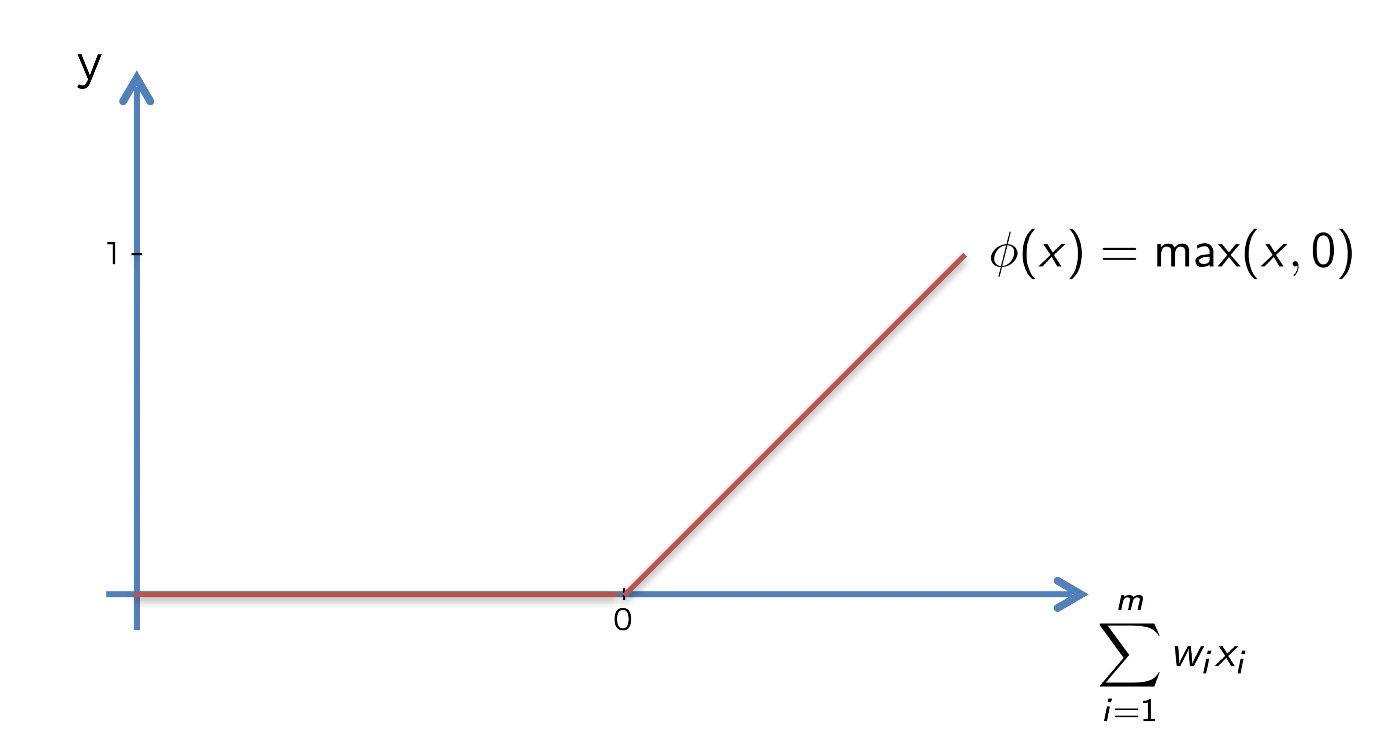

In [69]:
from IPython.display import Image
Image(filename='Rectifier.png', width=500, height=500)

In [70]:
classifier.add(layers.Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

* The parameters of Conv2D :
    * 32 : number of the feature detectors (filters).
    * (3,3) : dimensions of the filters. 
    * input_shape : so that all images are converted in the same format: 3 channels and (64,64) are the dimensions of the 2D array in each channel 
    * We use the Rectifier activation function: 

### Step 2 - Pooling

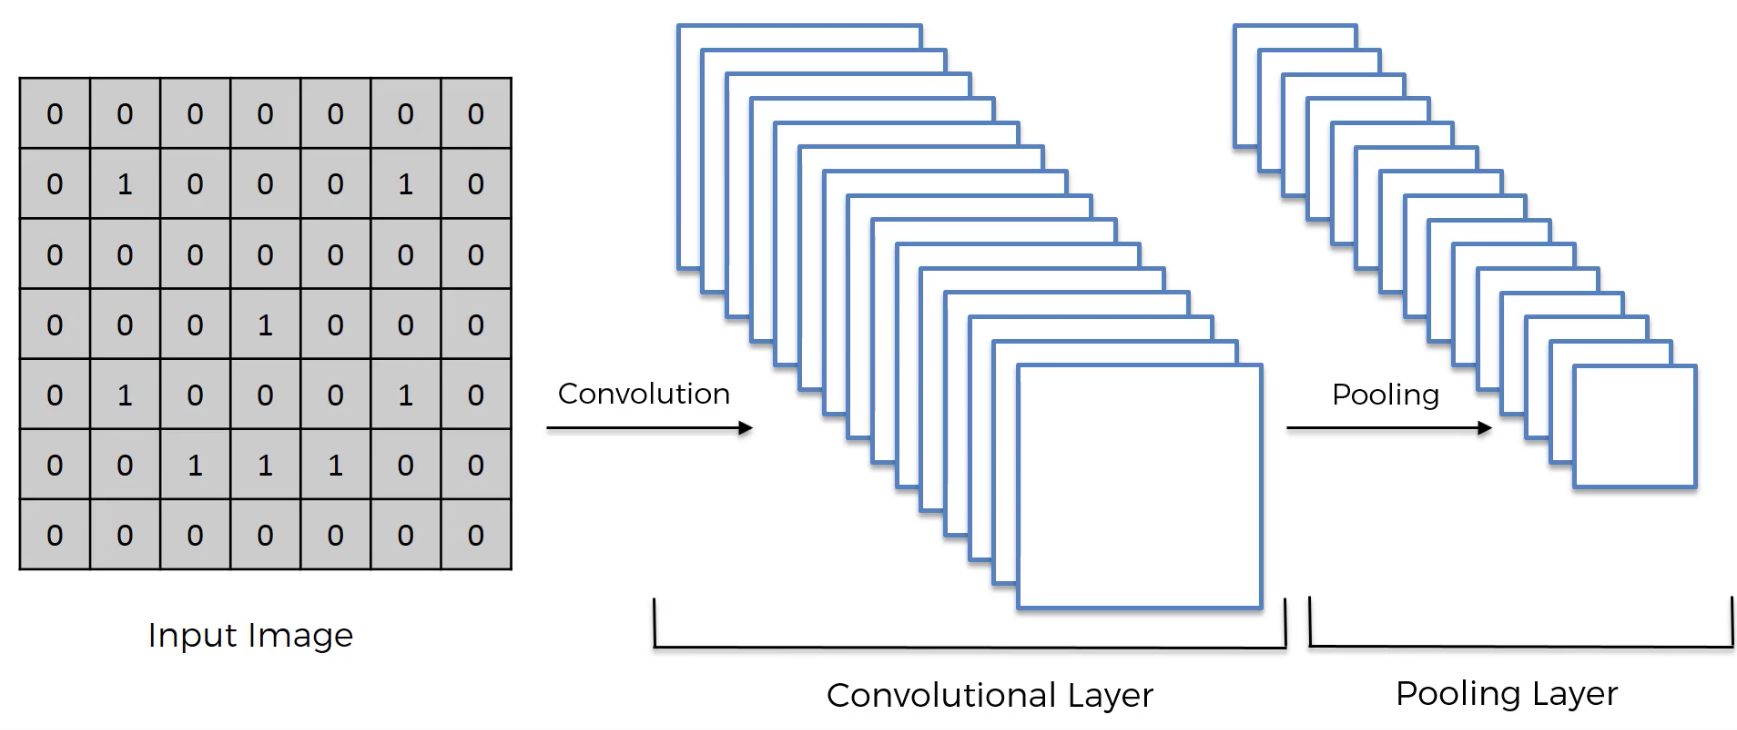

In [71]:
from IPython.display import Image
Image(filename='Pooling.png',width=800, height=800)

In [72]:
classifier.add(layers.MaxPooling2D(pool_size = (2, 2)))

* Parameters of MaxPooling2D:
    * pool_size: the size of the subtable that we slide all over the feature map to take the maximum in each subtable

### Step 3 - Flattening

In [73]:
classifier.add(layers.Flatten())

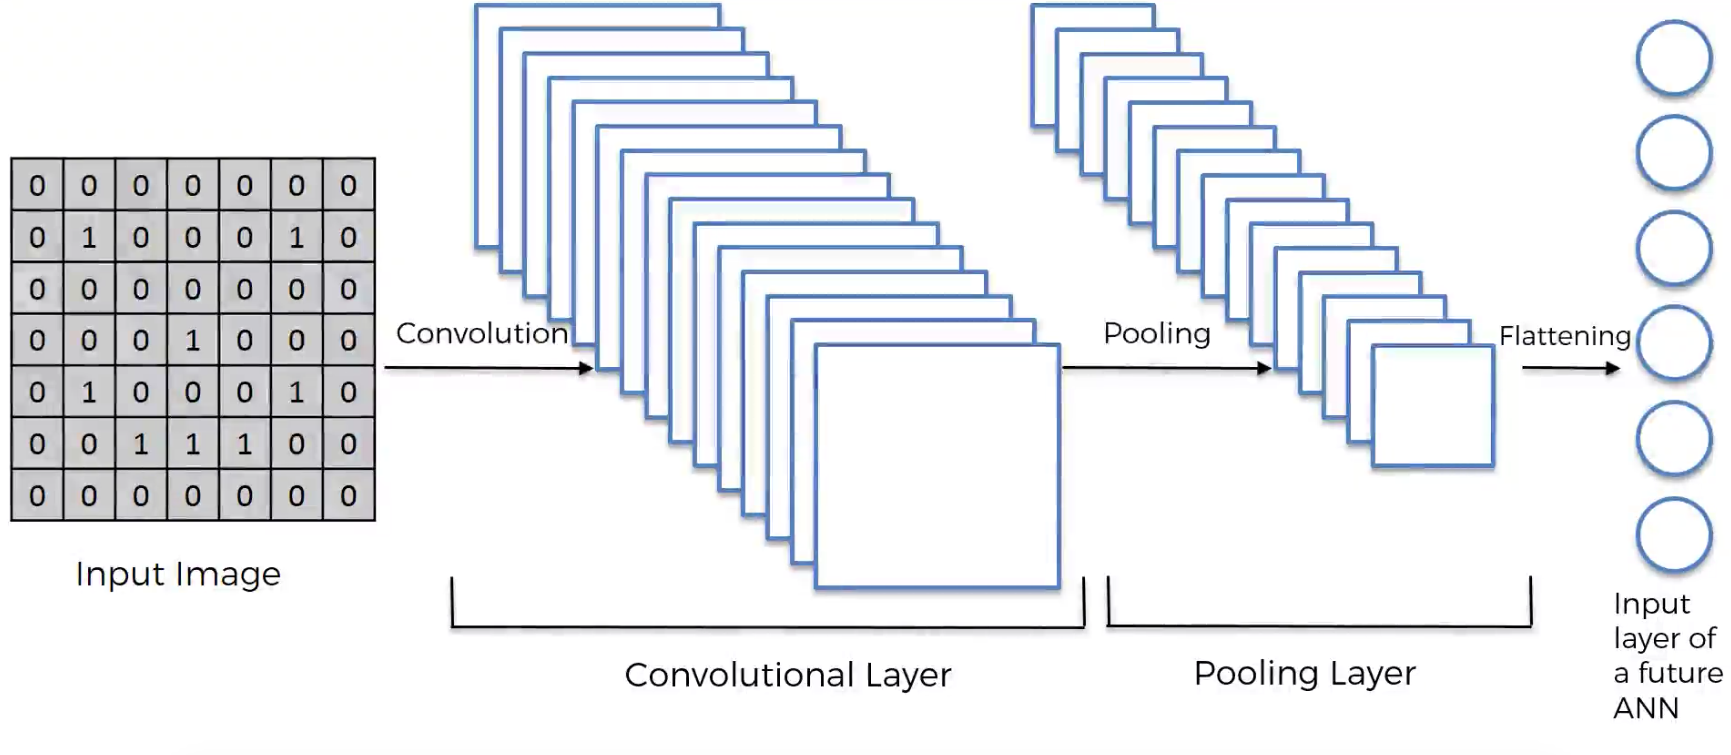

In [74]:
from IPython.display import Image
Image(filename='Flattening.png',width=800, height=800)

### Step 4 - Full Connection

In [75]:
classifier.add(layers.Dense(units = 128, activation = 'relu'))  # To add the hidden layer (fully connected layer)
classifier.add(layers.Dense(units = 1, activation = 'sigmoid')) # To add the output layer 

* ** We use the 'sigmoid' activation function for binary classification, but for multiclass classification, we can use the 'softmax' activation function**

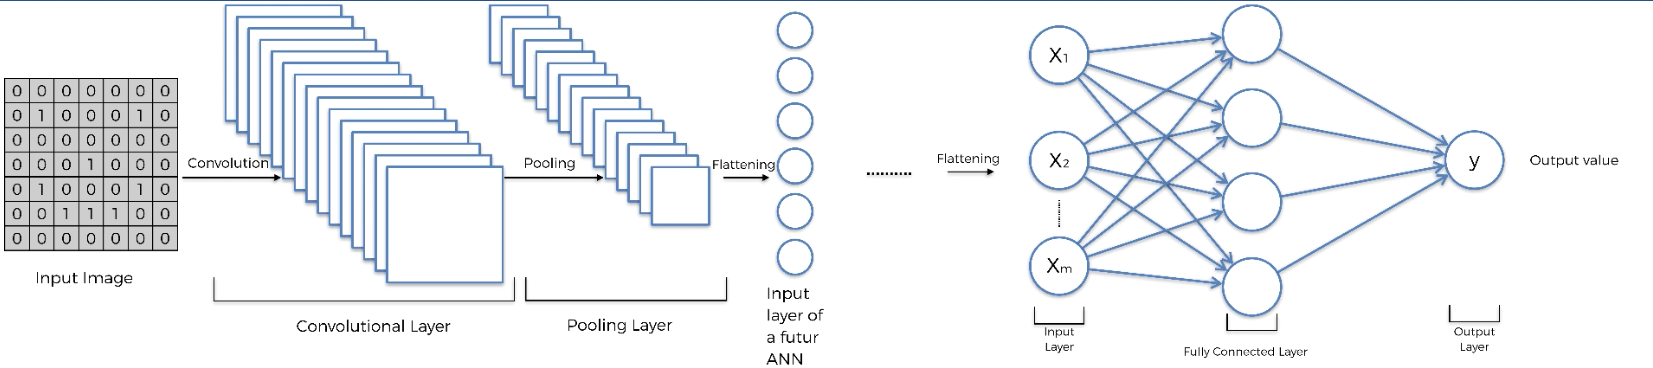

In [76]:
from IPython.display import Image
Image(filename='FullConnection.png',width=1000, height=1000)

### Compiling the CNN

In [77]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

* **Adam**: A Method for Stochastic Optimization https://arxiv.org/abs/1412.6980v8
* ** For multiclass classification we can use 'categorical_crossentropy' as a loss function**

## Part 2 - Fitting the CNN to the images

### Image Augmentation

** Keras Documentation for image processing: **  https://keras.io/preprocessing/image/

In [78]:
from keras.preprocessing.image import ImageDataGenerator

To avoid ** Overfitting ** we use the Image augmentation trick, which consists in generating new images by performing some transformations and then enriching the train set without adding more images

In [79]:
train_datagen = ImageDataGenerator(rescale = 1./255,  
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

### Training Set

In [80]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


* Description of the parameters:
    * We first have to specify the path for the training set and the test set
    * **target_size**: The size of the image expected by the CNN model (64,64) as in the process of building the CNN
    * **batch_size**: The size of the batches in which some random samples of our images will be included, which means the number of images that will go through the CNN after which the weights will be updated. 
    * **class_mode**: binary for binary classification
* ** We can use 'categorical' as class_mode for multiclass classification**    

### Test Set

In [81]:
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


* ** We can use 'categorical' as class_mode for multiclass classification**    

### Fitting the CNN to the Training Set

In [82]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 2000)

Epoch 1/5
8000/8000 [==============================] - 3354s - loss: 0.4181 - acc: 0.8015 - val_loss: 0.5533 - val_acc: 0.7976
Epoch 2/5
8000/8000 [==============================] - 3298s - loss: 0.2136 - acc: 0.9110 - val_loss: 0.7953 - val_acc: 0.7846
Epoch 3/5
8000/8000 [==============================] - 3401s - loss: 0.1287 - acc: 0.9503 - val_loss: 0.9203 - val_acc: 0.7854
Epoch 4/5
8000/8000 [==============================] - 15686s - loss: 0.0905 - acc: 0.9668 - val_loss: 1.0448 - val_acc: 0.7837
Epoch 5/5
8000/8000 [==============================] - 4436s - loss: 0.0699 - acc: 0.9750 - val_loss: 1.1837 - val_acc: 0.7773


* ** Results**:
    * On the train Set : ** Loss: 0.0699 **  ** Accuracy: 97 %**
    * On the test Set : ** Loss: 1.1837 **  ** Accuracy: 77 % **
    
* On constate qu'il y a une différence non négligeable entre les performences de l'algorithme sur le Train Set et le Test Set, il y a donc de l'overfitting. 

* En rajoutant une couche de convolution dans l'architecture, on y remédie. (cf partie suivante) 

## Making new predictions

Let's try to predict this two images: 

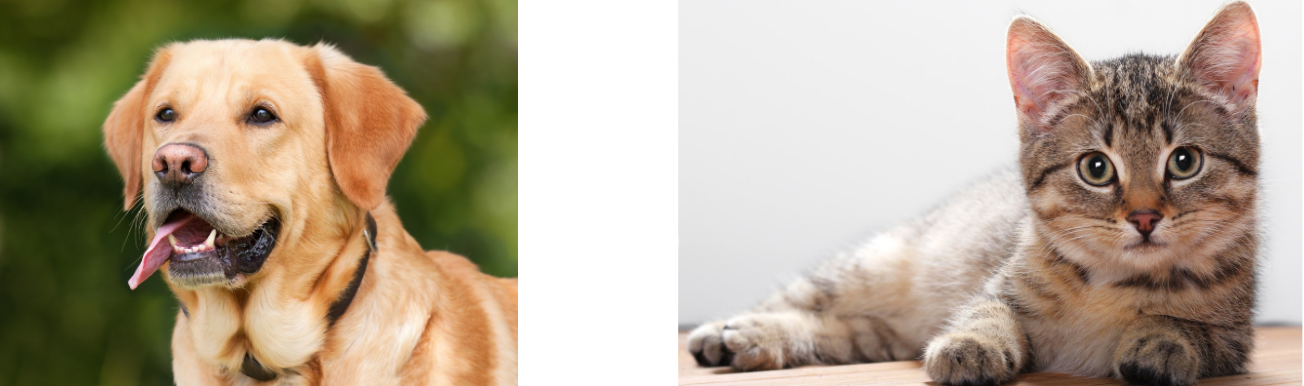

In [83]:
from IPython.display import Image
Image(filename='DogCat.png',width=800, height=800)

In [84]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

## Testing on a dog

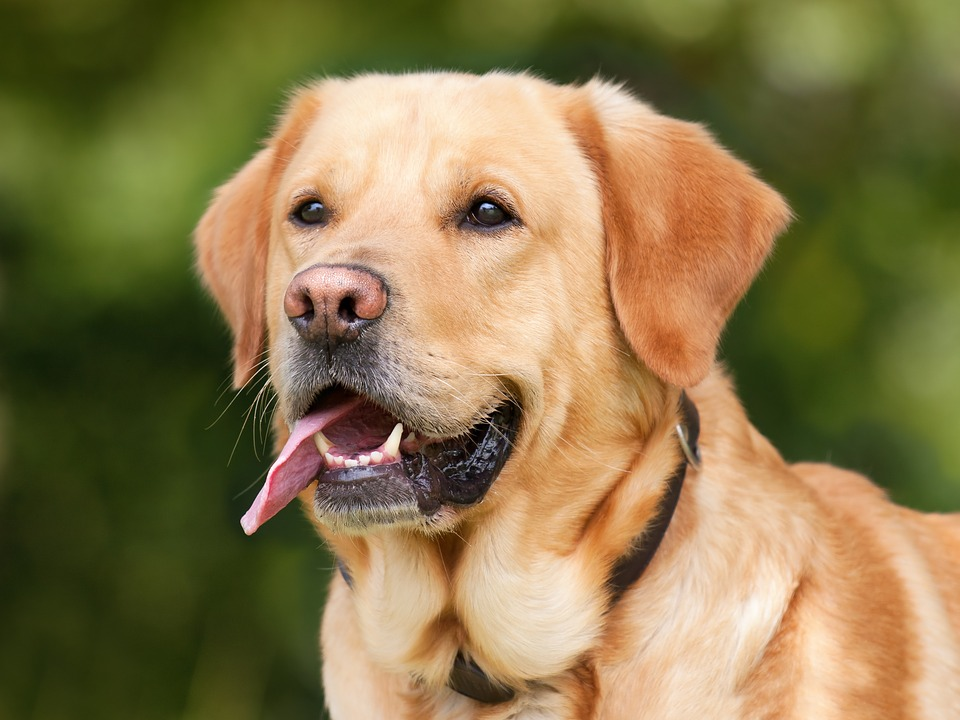

In [104]:
from IPython.display import Image
Image(filename='dog.jpg',width=500, height=500)

In [105]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/dog.jpg', target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
res = classifier.predict(test_image)
if res[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print 'The animal is a', prediction  

The animal is a dog


## Testing on a cat:

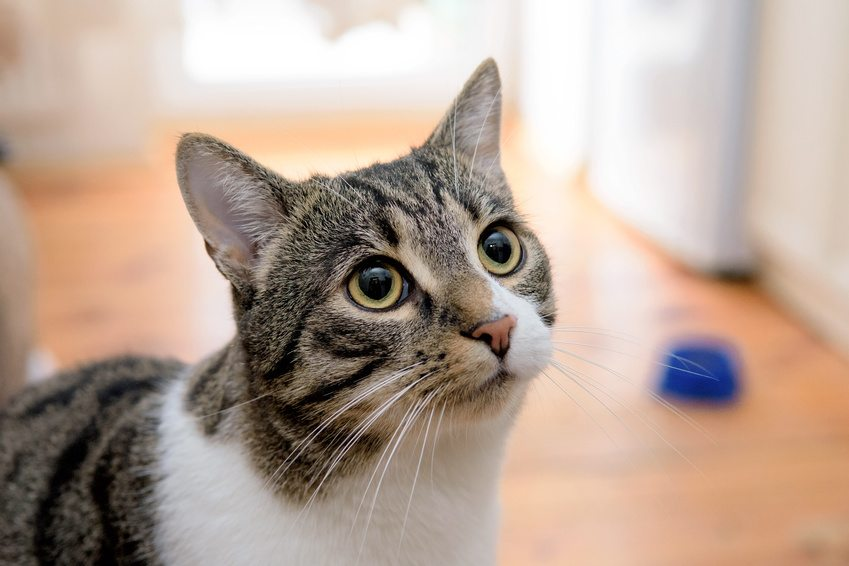

In [106]:
from IPython.display import Image
Image(filename='cat.jpg',width=500, height=500)

In [107]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat.jpg', target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
res = classifier.predict(test_image)
if res[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print 'The animal is a', prediction  

The animal is a cat


## Getting better performance by changing the architecture of the CNN 

In [ ]:
# Part 1 - Building the CNN

# Initialising the CNN
classifier_bis = Sequential()
# Step 1 - Convolution
classifier_bis.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier_bis.add(MaxPooling2D(pool_size = (2, 2)))

###########################################################
# Adding a second convolutional layer
###########################################################
classifier_bis.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier_bis.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier_bis.add(Flatten())

# Step 4 - Full connection
classifier_bis.add(Dense(units = 128, activation = 'relu'))
classifier_bis.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier_bis.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier_bis.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 2000)